#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import numpy.random as nr
import sys
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs



from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error

from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Read Data

In [ ]:
# import the cleaned dataset from a csv file
df  = pd.read_csv('/content/gdrive/MyDrive/UoH/Trimester 3/ALL DATASET (1)/co2/Others/cleaned_data.csv')
df

,country,year,Forest Area,Electric Power Consm,Electric Prod From Ren,Foss Fuel Energy Consm,GDP Per Capita,Renewable Electric Output,Total Greenhouse Gas Emissions,Urban Population,Foreign Direct Investment,Methane Emissions,CO2 Emissions Per Capita,CO2 Emissions
0,2.0,1992.0,789519.460000,53.486663,0.000000e+00,24.098076,656.362015,88.701162,4.429000e+04,40.039000,2.879560e+08,21470.000000,0.503264,6370.000000
1,0.0,1992.0,7849.000000,453.644074,0.000000e+00,56.079291,200.852220,95.050088,6.750000e+03,37.249000,2.000000e+07,3500.000000,0.689859,2240.000000
2,3.0,1992.0,199242.474999,1072.085893,1.000000e+06,94.149394,2033.963932,5.769018,1.174960e+06,50.778711,3.477597e+09,285160.000000,2.963701,690412.939333
3,128.0,1992.0,2578.860000,8284.410480,0.000000e+00,99.855222,26420.859883,0.000000,7.919000e+04,78.760000,1.297200e+08,12350.000000,29.051699,59640.000000
4,4.0,1992.0,348388.000000,1410.377544,1.020000e+08,88.805945,6823.538837,34.870528,2.562400e+05,87.542000,4.430978e+09,107470.000000,3.201675,107350.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,135.0,2019.0,145671.900000,3684.242121,5.513550e+09,67.839434,2715.275980,32.690259,4.501500e+05,36.628000,1.612000e+10,84252.621902,5.054110,309849.972023
3888,136.0,2019.0,5490.000000,3684.242121,5.513550e+09,67.839434,11760.019883,32.690259,2.526000e+04,37.273000,-3.709828e+08,84252.621902,5.054110,309849.972023
3889,111.0,2019.0,170864.900000,3684.242121,5.513550e+09,67.839434,6624.761865,32.690259,5.554300e+05,66.856000,5.116098e+09,84252.621902,5.054110,309849.972023
3890,137.0,2019.0,450022.400000,3684.242121,5.513550e+09,67.839434,1305.001031,32.690259,3.757000e+04,44.072000,5.479679e+08,84252.621902,5.054110,309849.972023


In [ ]:
df.info() #To view data infomation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         3892 non-null   float64
 1   year                            3892 non-null   float64
 2   Forest Area                     3892 non-null   float64
 3   Electric Power Consm            3892 non-null   float64
 4   Electric Prod From Ren          3892 non-null   float64
 5   Foss Fuel Energy Consm          3892 non-null   float64
 6   GDP Per Capita                  3892 non-null   float64
 7   Renewable Electric Output       3892 non-null   float64
 8   Total Greenhouse Gas Emissions  3892 non-null   float64
 9   Urban Population                3892 non-null   float64
 10  Foreign Direct Investment       3892 non-null   float64
 11  Methane Emissions               3892 non-null   float64
 12  CO2 Emissions Per Capita        38

Feauture Selection

In [ ]:
X = df.drop(['country','CO2 Emissions Per Capita','CO2 Emissions'], 1)       # selecting features X and y
y = df['CO2 Emissions Per Capita']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
!pip install mlxtend --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mlxtend #importing libraries

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)



In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_

('Electric Power Consm',
 'Foss Fuel Energy Consm',
 'GDP Per Capita',
 'Renewable Electric Output',
 'Urban Population')

In [ ]:
sfs.k_feature_idx_

(2, 4, 5, 6, 8)

In [ ]:
sfs.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.4093436]),
  'avg_score': 0.4093436041932881,
  'feature_names': ('Electric Power Consm',)},
 2: {'feature_idx': (2, 6),
  'cv_scores': array([0.54218682]),
  'avg_score': 0.5421868215997407,
  'feature_names': ('Electric Power Consm', 'Renewable Electric Output')},
 3: {'feature_idx': (2, 6, 8),
  'cv_scores': array([0.59431983]),
  'avg_score': 0.5943198280330989,
  'feature_names': ('Electric Power Consm',
   'Renewable Electric Output',
   'Urban Population')},
 4: {'feature_idx': (2, 5, 6, 8),
  'cv_scores': array([0.61263048]),
  'avg_score': 0.6126304802926044,
  'feature_names': ('Electric Power Consm',
   'GDP Per Capita',
   'Renewable Electric Output',
   'Urban Population')},
 5: {'feature_idx': (2, 4, 5, 6, 8),
  'cv_scores': array([0.62236965]),
  'avg_score': 0.6223696452486834,
  'feature_names': ('Electric Power Consm',
   'Foss Fuel Energy Consm',
   'GDP Per Capita',
   'Renewable Electric Output',
   'Urban Populatio

In [ ]:
metric_dict = sfs.get_metric_dict(confidence_interval=0.95)
metric_dict

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{1: {'feature_idx': (2,),
  'cv_scores': array([0.4093436]),
  'avg_score': 0.4093436041932881,
  'feature_names': ('Electric Power Consm',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (2, 6),
  'cv_scores': array([0.54218682]),
  'avg_score': 0.5421868215997407,
  'feature_names': ('Electric Power Consm', 'Renewable Electric Output'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (2, 6, 8),
  'cv_scores': array([0.59431983]),
  'avg_score': 0.5943198280330989,
  'feature_names': ('Electric Power Consm',
   'Renewable Electric Output',
   'Urban Population'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (2, 5, 6, 8),
  'cv_scores': array([0.61263048]),
  'avg_score': 0.6126304802926044,
  'feature_names': ('Electric Power Consm',
   'GDP Per Capita',
   'Renewable Electric Output',
   'Urban Population'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (2, 4, 5, 6, 

In [ ]:
df1 = pd.DataFrame.from_dict(metric_dict).T
df1

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)",[0.4093436041932881],0.409344,"(Electric Power Consm,)",NaN,0.0,NaN
2,"(2, 6)",[0.5421868215997407],0.542187,"(Electric Power Consm, Renewable Electric Output)",NaN,0.0,NaN
3,"(2, 6, 8)",[0.5943198280330989],0.59432,"(Electric Power Consm, Renewable Electric Outp...",NaN,0.0,NaN
4,"(2, 5, 6, 8)",[0.6126304802926044],0.61263,"(Electric Power Consm, GDP Per Capita, Renewab...",NaN,0.0,NaN
5,"(2, 4, 5, 6, 8)",[0.6223696452486834],0.62237,"(Electric Power Consm, Foss Fuel Energy Consm,...",NaN,0.0,NaN


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


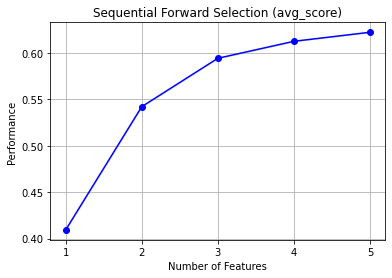

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (avg_score)')
plt.grid()
plt.show()

In [ ]:
sfs1=SFS(RandomForestRegressor(),
          k_features=5,
          forward=True,
          floating=False,
          cv = 0)

In [ ]:
sfs1.fit(X, y)
sfs1.k_feature_names_

('Forest Area',
 'Electric Power Consm',
 'Total Greenhouse Gas Emissions',
 'Urban Population',
 'Methane Emissions')

In [ ]:
sfs1.k_feature_idx_

(1, 2, 7, 8, 10)

In [ ]:
sfs1.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([0.91868135]),
  'avg_score': 0.9186813465475512,
  'feature_names': ('Forest Area',)},
 2: {'feature_idx': (1, 10),
  'cv_scores': array([0.99131152]),
  'avg_score': 0.9913115158932858,
  'feature_names': ('Forest Area', 'Methane Emissions')},
 3: {'feature_idx': (1, 8, 10),
  'cv_scores': array([0.99682382]),
  'avg_score': 0.9968238207562183,
  'feature_names': ('Forest Area', 'Urban Population', 'Methane Emissions')},
 4: {'feature_idx': (1, 2, 8, 10),
  'cv_scores': array([0.99742218]),
  'avg_score': 0.9974221801927412,
  'feature_names': ('Forest Area',
   'Electric Power Consm',
   'Urban Population',
   'Methane Emissions')},
 5: {'feature_idx': (1, 2, 7, 8, 10),
  'cv_scores': array([0.99758862]),
  'avg_score': 0.9975886161328764,
  'feature_names': ('Forest Area',
   'Electric Power Consm',
   'Total Greenhouse Gas Emissions',
   'Urban Population',
   'Methane Emissions')}}

In [ ]:
metric_dict1 = sfs1.get_metric_dict(confidence_interval=0.95)
metric_dict1

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{1: {'feature_idx': (1,),
  'cv_scores': array([0.91868135]),
  'avg_score': 0.9186813465475512,
  'feature_names': ('Forest Area',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (1, 10),
  'cv_scores': array([0.99131152]),
  'avg_score': 0.9913115158932858,
  'feature_names': ('Forest Area', 'Methane Emissions'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (1, 8, 10),
  'cv_scores': array([0.99682382]),
  'avg_score': 0.9968238207562183,
  'feature_names': ('Forest Area', 'Urban Population', 'Methane Emissions'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (1, 2, 8, 10),
  'cv_scores': array([0.99742218]),
  'avg_score': 0.9974221801927412,
  'feature_names': ('Forest Area',
   'Electric Power Consm',
   'Urban Population',
   'Methane Emissions'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (1, 2, 7, 8, 10),
  'cv_scores': array([0.99758862]),
  'avg_score': 

In [ ]:
df2 = pd.DataFrame.from_dict(metric_dict1).T
df2

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)",[0.9186813465475512],0.918681,"(Forest Area,)",NaN,0.0,NaN
2,"(1, 10)",[0.9913115158932858],0.991312,"(Forest Area, Methane Emissions)",NaN,0.0,NaN
3,"(1, 8, 10)",[0.9968238207562183],0.996824,"(Forest Area, Urban Population, Methane Emissi...",NaN,0.0,NaN
4,"(1, 2, 8, 10)",[0.9974221801927412],0.997422,"(Forest Area, Electric Power Consm, Urban Popu...",NaN,0.0,NaN
5,"(1, 2, 7, 8, 10)",[0.9975886161328764],0.997589,"(Forest Area, Electric Power Consm, Total Gree...",NaN,0.0,NaN


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


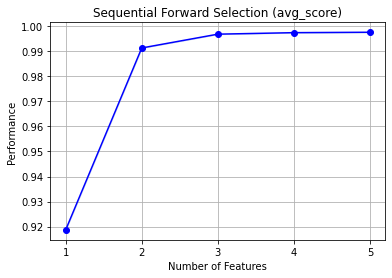

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs1
import matplotlib.pyplot as plt
fig1 = plot_sfs1(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (avg_score)')
plt.grid()
plt.show()

In [ ]:
sfs2 = SFS(RandomForestRegressor(),
           k_features="best", # or (1, 13) and then select by hand 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='r2',
           cv=5)




In [ ]:
sfs2.fit(X, y)
sfs2.k_feature_names_

('Forest Area',
 'Electric Power Consm',
 'Total Greenhouse Gas Emissions',
 'Urban Population')

In [ ]:
sfs2.k_feature_idx_

(1, 2, 7, 8)

In [ ]:
sfs2.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([ 0.62062237,  0.76457891,  0.75503738,  0.6203295 , -0.09410884]),
  'avg_score': 0.5332918646751587,
  'feature_names': ('Electric Power Consm',)},
 2: {'feature_idx': (1, 2),
  'cv_scores': array([0.82577872, 0.97622854, 0.96595132, 0.94550123, 0.02628544]),
  'avg_score': 0.7479490483784698,
  'feature_names': ('Forest Area', 'Electric Power Consm')},
 3: {'feature_idx': (1, 2, 7),
  'cv_scores': array([0.84540965, 0.98434609, 0.98280741, 0.96520497, 0.25410601]),
  'avg_score': 0.8063748257491768,
  'feature_names': ('Forest Area',
   'Electric Power Consm',
   'Total Greenhouse Gas Emissions')},
 4: {'feature_idx': (1, 2, 7, 8),
  'cv_scores': array([0.89679749, 0.98981945, 0.98443737, 0.96357611, 0.30806751]),
  'avg_score': 0.8285395876358022,
  'feature_names': ('Forest Area',
   'Electric Power Consm',
   'Total Greenhouse Gas Emissions',
   'Urban Population')},
 5: {'feature_idx': (0, 1, 2, 7, 8),
  'cv_scores': array([0.890245

In [ ]:
metric_dict2 = sfs2.get_metric_dict(confidence_interval=0.95)
metric_dict2

{1: {'feature_idx': (2,),
  'cv_scores': array([ 0.62062237,  0.76457891,  0.75503738,  0.6203295 , -0.09410884]),
  'avg_score': 0.5332918646751587,
  'feature_names': ('Electric Power Consm',),
  'ci_bound': 0.41109164677071147,
  'std_dev': 0.3198432673219911,
  'std_err': 0.15992163366099554},
 2: {'feature_idx': (1, 2),
  'cv_scores': array([0.82577872, 0.97622854, 0.96595132, 0.94550123, 0.02628544]),
  'avg_score': 0.7479490483784698,
  'feature_names': ('Forest Area', 'Electric Power Consm'),
  'ci_bound': 0.468917815684178,
  'std_dev': 0.3648339912816836,
  'std_err': 0.1824169956408418},
 3: {'feature_idx': (1, 2, 7),
  'cv_scores': array([0.84540965, 0.98434609, 0.98280741, 0.96520497, 0.25410601]),
  'avg_score': 0.8063748257491768,
  'feature_names': ('Forest Area',
   'Electric Power Consm',
   'Total Greenhouse Gas Emissions'),
  'ci_bound': 0.3610518354485449,
  'std_dev': 0.28091059409648883,
  'std_err': 0.14045529704824442},
 4: {'feature_idx': (1, 2, 7, 8),
  'cv_s

In [ ]:
df3 = pd.DataFrame.from_dict(metric_dict2).T
df3

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.6206223720414465, 0.7645789135019889, 0.755...",0.533292,"(Electric Power Consm,)",0.411092,0.319843,0.159922
2,"(1, 2)","[0.8257787219591054, 0.9762285363855915, 0.965...",0.747949,"(Forest Area, Electric Power Consm)",0.468918,0.364834,0.182417
3,"(1, 2, 7)","[0.8454096534435784, 0.9843460891789404, 0.982...",0.806375,"(Forest Area, Electric Power Consm, Total Gree...",0.361052,0.280911,0.140455
4,"(1, 2, 7, 8)","[0.8967974945204821, 0.9898194530681691, 0.984...",0.82854,"(Forest Area, Electric Power Consm, Total Gree...",0.337178,0.262336,0.131168
5,"(0, 1, 2, 7, 8)","[0.8902455210616258, 0.9899878941278073, 0.982...",0.826806,"(year, Forest Area, Electric Power Consm, Tota...",0.337314,0.262442,0.131221
6,"(0, 1, 2, 7, 8, 10)","[0.8799152479092496, 0.9886844101398983, 0.985...",0.823059,"(year, Forest Area, Electric Power Consm, Tota...",0.343416,0.26719,0.133595
7,"(0, 1, 2, 7, 8, 9, 10)","[0.8764333811288808, 0.9889121636021071, 0.981...",0.820004,"(year, Forest Area, Electric Power Consm, Tota...",0.343364,0.267149,0.133575
8,"(0, 1, 2, 6, 7, 8, 9, 10)","[0.9115333316069113, 0.9855375779596849, 0.983...",0.81843,"(year, Forest Area, Electric Power Consm, Rene...",0.375756,0.292351,0.146176
9,"(0, 1, 2, 4, 6, 7, 8, 9, 10)","[0.9026864076002648, 0.9912997811640416, 0.985...",0.820616,"(year, Forest Area, Electric Power Consm, Foss...",0.369729,0.287662,0.143831
10,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10)","[0.916335374241878, 0.9909884995483075, 0.9774...",0.823413,"(year, Forest Area, Electric Power Consm, Foss...",0.366029,0.284783,0.142392


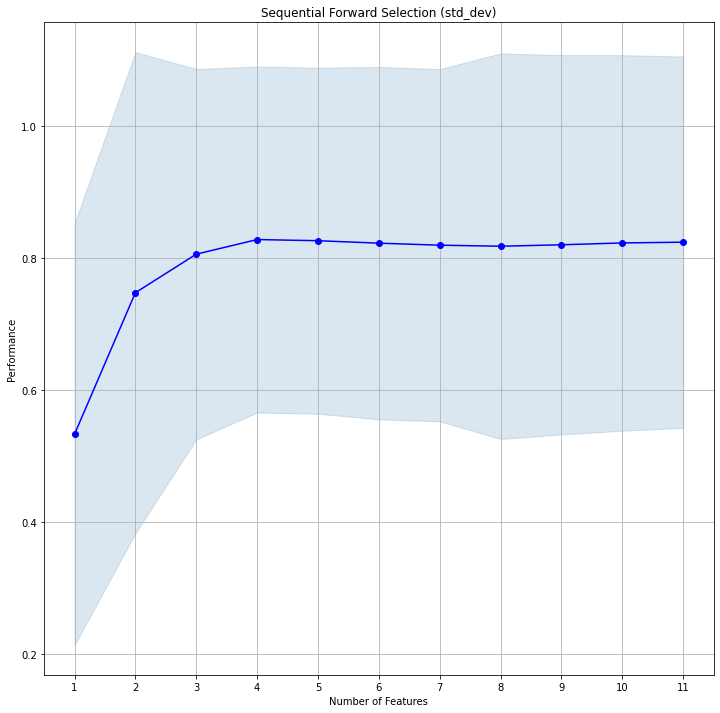

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs1
import matplotlib.pyplot as plt
fig3 = plot_sfs1(sfs2.get_metric_dict(), kind='std_dev', figsize=(12,12))
plt.title('Sequential Forward Selection (std_dev)')
plt.grid()
plt.show()

#Testing Each Feature

In [ ]:
# Pick features from the dataframe dropping the label column
X = df.drop(['CO2 Emissions Per Capita','CO2 Emissions'],  axis=1)
# Pick label from the dataframe
y = df['CO2 Emissions Per Capita']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Import Random forest regression algorithm from sklearn
from sklearn.ensemble import RandomForestRegressor
# Train the model
rf_model_test = RandomForestRegressor()
rf_model_test.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions
y_rf_pred = rf_model_test.predict(X_test)

In [ ]:
# Observe quality of the model
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_rf_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_rf_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_rf_pred)))
print('MSE: {:0.4f}'.format(mean_squared_error(y_test, y_rf_pred)))

RMSE: 0.9037
MAE: 0.3810
R2_score: 0.9714
MSE: 0.8166


In [ ]:
# Generate frame from predicted and actual values
frames = [y_rf_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,0.710873,0.692572
1,4.789655,5.054110
2,7.380904,7.874950
3,9.125359,9.401019
4,1.556121,1.625841


In [ ]:
# View error margin
y_rf_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_rf_pred['pred_values'] = (y_rf_pred['pred_values'].map(lambda x: round(x,2)))
y_rf_pred['diff'] = abs(y_rf_pred['real_values'] -y_rf_pred['pred_values'])
print('mean diff: ', abs(y_rf_pred['diff']).mean())

mean diff:  0.38116364238592715


In [ ]:
# View difference table of actual and predicted value
y_rf_pred.head(10)

,pred_values,real_values,diff
0,0.71,0.692572,0.017428
1,4.79,5.054110,0.264110
2,7.38,7.874950,0.494950
3,9.13,9.401019,0.271019
4,1.56,1.625841,0.065841
5,8.47,7.468655,1.001345
6,7.35,7.261632,0.088368
7,0.15,0.172293,0.022293
8,14.11,15.651386,1.541386
9,18.48,19.043279,0.563279


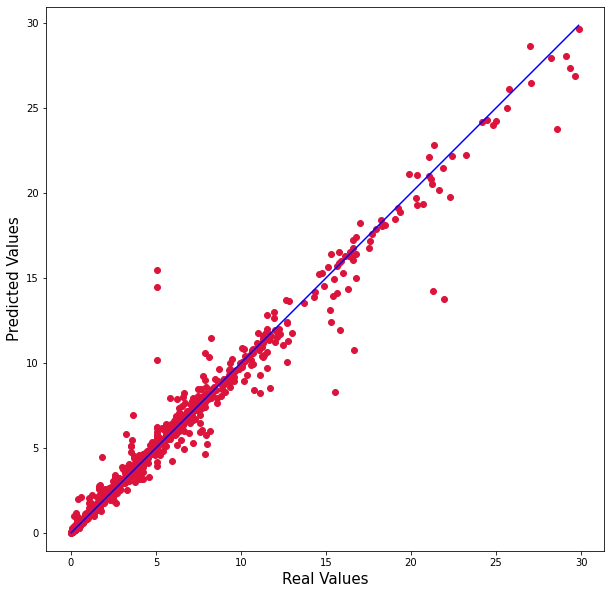

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_rf_pred.real_values, y_rf_pred.pred_values, c='crimson')

p1 = max(max(y_rf_pred.pred_values), max(y_rf_pred.real_values))
p2 = min(min(y_rf_pred.pred_values), min(y_rf_pred.real_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

Dropping Forerst Area

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         3892 non-null   float64
 1   year                            3892 non-null   float64
 2   Forest Area                     3892 non-null   float64
 3   Electric Power Consm            3892 non-null   float64
 4   Electric Prod From Ren          3892 non-null   float64
 5   Foss Fuel Energy Consm          3892 non-null   float64
 6   GDP Per Capita                  3892 non-null   float64
 7   Renewable Electric Output       3892 non-null   float64
 8   Total Greenhouse Gas Emissions  3892 non-null   float64
 9   Urban Population                3892 non-null   float64
 10  Foreign Direct Investment       3892 non-null   float64
 11  Methane Emissions               3892 non-null   float64
 12  CO2 Emissions Per Capita        38

In [ ]:
# Pick features from the dataframe dropping the label column
X = df.drop(['CO2 Emissions Per Capita','CO2 Emissions', 'Forest Area'],  axis=1)
# Pick label from the dataframe
y = df['CO2 Emissions Per Capita']

In [ ]:
X

,country,year,Electric Power Consm,Electric Prod From Ren,Foss Fuel Energy Consm,GDP Per Capita,Renewable Electric Output,Total Greenhouse Gas Emissions,Urban Population,Foreign Direct Investment,Methane Emissions
0,2.0,1992.0,53.486663,0.000000e+00,24.098076,656.362015,88.701162,4.429000e+04,40.039000,2.879560e+08,21470.000000
1,0.0,1992.0,453.644074,0.000000e+00,56.079291,200.852220,95.050088,6.750000e+03,37.249000,2.000000e+07,3500.000000
2,3.0,1992.0,1072.085893,1.000000e+06,94.149394,2033.963932,5.769018,1.174960e+06,50.778711,3.477597e+09,285160.000000
3,128.0,1992.0,8284.410480,0.000000e+00,99.855222,26420.859883,0.000000,7.919000e+04,78.760000,1.297200e+08,12350.000000
4,4.0,1992.0,1410.377544,1.020000e+08,88.805945,6823.538837,34.870528,2.562400e+05,87.542000,4.430978e+09,107470.000000
...,...,...,...,...,...,...,...,...,...,...,...
3887,135.0,2019.0,3684.242121,5.513550e+09,67.839434,2715.275980,32.690259,4.501500e+05,36.628000,1.612000e+10,84252.621902
3888,136.0,2019.0,3684.242121,5.513550e+09,67.839434,11760.019883,32.690259,2.526000e+04,37.273000,-3.709828e+08,84252.621902
3889,111.0,2019.0,3684.242121,5.513550e+09,67.839434,6624.761865,32.690259,5.554300e+05,66.856000,5.116098e+09,84252.621902
3890,137.0,2019.0,3684.242121,5.513550e+09,67.839434,1305.001031,32.690259,3.757000e+04,44.072000,5.479679e+08,84252.621902


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Import Random forest regression algorithm from sklearn
from sklearn.ensemble import RandomForestRegressor
# Train the model
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions
y_model1_pred =model1.predict(X_test)

In [ ]:
# Observe quality of the model
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_model1_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_model1_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_model1_pred)))
print('MSE: {:0.4f}'.format(mean_squared_error(y_test, y_model1_pred)))

RMSE: 0.9253
MAE: 0.3992
R2_score: 0.9701
MSE: 0.8562


Dropping Electric Power Consumption

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         3892 non-null   float64
 1   year                            3892 non-null   float64
 2   Forest Area                     3892 non-null   float64
 3   Electric Power Consm            3892 non-null   float64
 4   Electric Prod From Ren          3892 non-null   float64
 5   Foss Fuel Energy Consm          3892 non-null   float64
 6   GDP Per Capita                  3892 non-null   float64
 7   Renewable Electric Output       3892 non-null   float64
 8   Total Greenhouse Gas Emissions  3892 non-null   float64
 9   Urban Population                3892 non-null   float64
 10  Foreign Direct Investment       3892 non-null   float64
 11  Methane Emissions               3892 non-null   float64
 12  CO2 Emissions Per Capita        38

In [ ]:
# Pick features from the dataframe dropping the label column
X = df.drop(['CO2 Emissions Per Capita','CO2 Emissions', 'Electric Power Consm'],  axis=1)
# Pick label from the dataframe
y = df['CO2 Emissions Per Capita']

In [ ]:
X

,country,year,Forest Area,Electric Prod From Ren,Foss Fuel Energy Consm,GDP Per Capita,Renewable Electric Output,Total Greenhouse Gas Emissions,Urban Population,Foreign Direct Investment,Methane Emissions
0,2.0,1992.0,789519.460000,0.000000e+00,24.098076,656.362015,88.701162,4.429000e+04,40.039000,2.879560e+08,21470.000000
1,0.0,1992.0,7849.000000,0.000000e+00,56.079291,200.852220,95.050088,6.750000e+03,37.249000,2.000000e+07,3500.000000
2,3.0,1992.0,199242.474999,1.000000e+06,94.149394,2033.963932,5.769018,1.174960e+06,50.778711,3.477597e+09,285160.000000
3,128.0,1992.0,2578.860000,0.000000e+00,99.855222,26420.859883,0.000000,7.919000e+04,78.760000,1.297200e+08,12350.000000
4,4.0,1992.0,348388.000000,1.020000e+08,88.805945,6823.538837,34.870528,2.562400e+05,87.542000,4.430978e+09,107470.000000
...,...,...,...,...,...,...,...,...,...,...,...
3887,135.0,2019.0,145671.900000,5.513550e+09,67.839434,2715.275980,32.690259,4.501500e+05,36.628000,1.612000e+10,84252.621902
3888,136.0,2019.0,5490.000000,5.513550e+09,67.839434,11760.019883,32.690259,2.526000e+04,37.273000,-3.709828e+08,84252.621902
3889,111.0,2019.0,170864.900000,5.513550e+09,67.839434,6624.761865,32.690259,5.554300e+05,66.856000,5.116098e+09,84252.621902
3890,137.0,2019.0,450022.400000,5.513550e+09,67.839434,1305.001031,32.690259,3.757000e+04,44.072000,5.479679e+08,84252.621902


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Import Random forest regression algorithm from sklearn
from sklearn.ensemble import RandomForestRegressor
# Train the model
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions
y_model2_pred =model2.predict(X_test)

In [ ]:
# Observe quality of the model
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_model2_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_model2_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_model2_pred)))
print('MSE: {:0.4f}'.format(mean_squared_error(y_test, y_model2_pred)))

RMSE: 0.9468
MAE: 0.4301
R2_score: 0.9686
MSE: 0.8965


Dropping Total Greenhouse gas Emission

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         3892 non-null   float64
 1   year                            3892 non-null   float64
 2   Forest Area                     3892 non-null   float64
 3   Electric Power Consm            3892 non-null   float64
 4   Electric Prod From Ren          3892 non-null   float64
 5   Foss Fuel Energy Consm          3892 non-null   float64
 6   GDP Per Capita                  3892 non-null   float64
 7   Renewable Electric Output       3892 non-null   float64
 8   Total Greenhouse Gas Emissions  3892 non-null   float64
 9   Urban Population                3892 non-null   float64
 10  Foreign Direct Investment       3892 non-null   float64
 11  Methane Emissions               3892 non-null   float64
 12  CO2 Emissions Per Capita        38

In [ ]:
# Pick features from the dataframe dropping the label column
X = df.drop(['CO2 Emissions Per Capita','CO2 Emissions', 'Total Greenhouse Gas Emissions'],  axis=1)
# Pick label from the dataframe
y = df['CO2 Emissions Per Capita']

In [ ]:
X

,country,year,Forest Area,Electric Power Consm,Electric Prod From Ren,Foss Fuel Energy Consm,GDP Per Capita,Renewable Electric Output,Urban Population,Foreign Direct Investment,Methane Emissions
0,2.0,1992.0,789519.460000,53.486663,0.000000e+00,24.098076,656.362015,88.701162,40.039000,2.879560e+08,21470.000000
1,0.0,1992.0,7849.000000,453.644074,0.000000e+00,56.079291,200.852220,95.050088,37.249000,2.000000e+07,3500.000000
2,3.0,1992.0,199242.474999,1072.085893,1.000000e+06,94.149394,2033.963932,5.769018,50.778711,3.477597e+09,285160.000000
3,128.0,1992.0,2578.860000,8284.410480,0.000000e+00,99.855222,26420.859883,0.000000,78.760000,1.297200e+08,12350.000000
4,4.0,1992.0,348388.000000,1410.377544,1.020000e+08,88.805945,6823.538837,34.870528,87.542000,4.430978e+09,107470.000000
...,...,...,...,...,...,...,...,...,...,...,...
3887,135.0,2019.0,145671.900000,3684.242121,5.513550e+09,67.839434,2715.275980,32.690259,36.628000,1.612000e+10,84252.621902
3888,136.0,2019.0,5490.000000,3684.242121,5.513550e+09,67.839434,11760.019883,32.690259,37.273000,-3.709828e+08,84252.621902
3889,111.0,2019.0,170864.900000,3684.242121,5.513550e+09,67.839434,6624.761865,32.690259,66.856000,5.116098e+09,84252.621902
3890,137.0,2019.0,450022.400000,3684.242121,5.513550e+09,67.839434,1305.001031,32.690259,44.072000,5.479679e+08,84252.621902


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Import Random forest regression algorithm from sklearn
from sklearn.ensemble import RandomForestRegressor
# Train the model
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions
y_model3_pred = model3.predict(X_test)

In [ ]:
# Observe quality of the model
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_model3_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_model3_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_model3_pred)))
print('MSE: {:0.4f}'.format(mean_squared_error(y_test, y_model3_pred)))

RMSE: 0.9433
MAE: 0.3925
R2_score: 0.9689
MSE: 0.8899


Dropping GDP Per Capita

In [ ]:
# Pick features from the dataframe dropping the label column
X = df.drop(['CO2 Emissions Per Capita','CO2 Emissions', 'GDP Per Capita'],  axis=1)
# Pick label from the dataframe
y = df['CO2 Emissions Per Capita']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Import Random forest regression algorithm from sklearn
from sklearn.ensemble import RandomForestRegressor
# Train the model
model4 = RandomForestRegressor()
model4.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions
y_model4_pred =model4.predict(X_test)

In [ ]:
# Observe quality of the model
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_model4_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_model4_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_model4_pred)))
print('MSE: {:0.4f}'.format(mean_squared_error(y_test, y_model4_pred)))

RMSE: 1.0791
MAE: 0.4119
R2_score: 0.9593
MSE: 1.1644


Dropping Urban Population

In [ ]:
# Pick features from the dataframe dropping the label column
X = df.drop(['CO2 Emissions Per Capita','CO2 Emissions', 'Urban Population'],  axis=1)
# Pick label from the dataframe
y = df['CO2 Emissions Per Capita']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Import Random forest regression algorithm from sklearn
from sklearn.ensemble import RandomForestRegressor
# Train the model
model5 = RandomForestRegressor()
model5.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions
y_model5_pred =model5.predict(X_test)

In [ ]:
# Observe quality of the model
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_model5_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_model5_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_model5_pred)))
print('MSE: {:0.4f}'.format(mean_squared_error(y_test, y_model5_pred)))

RMSE: 0.8955
MAE: 0.3863
R2_score: 0.9720
MSE: 0.8019


Dropping Methane Emissions


In [ ]:
# Pick features from the dataframe dropping the label column
X = df.drop(['CO2 Emissions Per Capita','CO2 Emissions', 'Methane Emissions'],  axis=1)
# Pick label from the dataframe
y = df['CO2 Emissions Per Capita']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Import Random forest regression algorithm from sklearn
from sklearn.ensemble import RandomForestRegressor
# Train the model
model6 = RandomForestRegressor()
model6.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions
y_model6_pred =model6.predict(X_test)

In [ ]:
# Observe quality of the model
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_model6_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_model6_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_model6_pred)))
print('MSE: {:0.4f}'.format(mean_squared_error(y_test, y_model6_pred)))

RMSE: 0.9783
MAE: 0.4090
R2_score: 0.9665
MSE: 0.9571


In [ ]:
models =['model1','model2','model3', 'model4', 'model5', 'model6']

frame = pd.DataFrame(columns={'MODELS':[],'RMSE':[], 'MAE':[],'MSE':[]})

for i in range(len(models)):
    if models[i] == 'model1': # Forest Area
        # Define model
        model1 = RandomForestRegressor()
        model1.fit(X_train,y_train)
        # Make Predictions
        
        y_model1_pred = model1.predict(X_test)
        RMSE = np.sqrt(mean_squared_error(y_test,y_model1_pred))
        MAE = mean_absolute_error(y_test,y_model1_pred)
        MSE = mean_squared_error(y_test, y_model1_pred)
        # Add to dataframe
        frame.loc[frame.shape[0]] = ['Forest Area', RMSE, MAE,MSE]
        
    elif models[i] == 'model2': # Electric Power Consumption
        # Define model
        model2 = RandomForestRegressor()
        model2.fit(X_train,y_train)
        # Make Predictions
        
        y_model2_pred = model2.predict(X_test)
        RMSE = np.sqrt(mean_squared_error(y_test,y_model2_pred))
        MAE = mean_absolute_error(y_test,y_model2_pred)
        MSE = mean_squared_error(y_test, y_model2_pred)
        # Add to dataframe
        frame.loc[frame.shape[0]] = ['Electric Power Consumption', RMSE, MAE,MSE]

    elif models[i] == 'model3': # Total Greenhouse Gas Emissions
        # Define model
        model3 = RandomForestRegressor()
        model3.fit(X_train,y_train)
        # Make Predictions
        
        y_model3_pred = model3.predict(X_test)
        RMSE = np.sqrt(mean_squared_error(y_test,y_model3_pred))
        MAE = mean_absolute_error(y_test,y_model3_pred)
        MSE = mean_squared_error(y_test, y_model3_pred)
        # Add to dataframe
        frame.loc[frame.shape[0]] = ['Total Greenhouse Gas Emissions', RMSE, MAE,MSE]

    elif models[i] == 'model4': # GDP Per Capita
        # Define model
        model4 = RandomForestRegressor()
        model4.fit(X_train,y_train)
        # Make Predictions
        
        y_model4_pred = model4.predict(X_test)
        RMSE = np.sqrt(mean_squared_error(y_test,y_model4_pred))
        MAE = mean_absolute_error(y_test,y_model4_pred)
        MSE = mean_squared_error(y_test, y_model4_pred)
        # Add to dataframe
        frame.loc[frame.shape[0]] = ['GDP Per Capita', RMSE, MAE,MSE]

    elif models[i] == 'model5': # Urban Population
        # Define model
        model5 = RandomForestRegressor()
        model5.fit(X_train,y_train)
        # Make Predictions
        
        y_model5_pred = model5.predict(X_test)
        RMSE = np.sqrt(mean_squared_error(y_test,y_model5_pred))
        MAE = mean_absolute_error(y_test,y_model5_pred)
        MSE = mean_squared_error(y_test, y_model5_pred)
        # Add to dataframe
        frame.loc[frame.shape[0]] = ['Urban Population', RMSE, MAE,MSE]

    else  : 
        models[i] =='model6' # Methane Emissio
         # Define model
        model6 = RandomForestRegressor()
        model6.fit(X_train,y_train)
        # Make Predictions

        y_model6_pred = model6.predict(X_test)
        RMSE = np.sqrt(mean_squared_error(y_test,y_model6_pred))
        MAE = mean_absolute_error(y_test,y_model6_pred)
        MSE = mean_squared_error(y_test, y_model6_pred)
        # Add to dataframe
        frame.loc[frame.shape[0]] = ['Methane Emission', RMSE, MAE,MSE]


In [ ]:
frame

,MODELS,RMSE,MAE,MSE
0,Forest Area,0.952013,0.403139,0.906329
1,Electric Power Consumption,0.984896,0.409294,0.970020
2,Total Greenhouse Gas Emissions,0.956650,0.411074,0.915179
3,GDP Per Capita,0.982589,0.412170,0.965481
4,Urban Population,0.990695,0.409008,0.981476
5,Methane Emission,0.959257,0.406391,0.920174


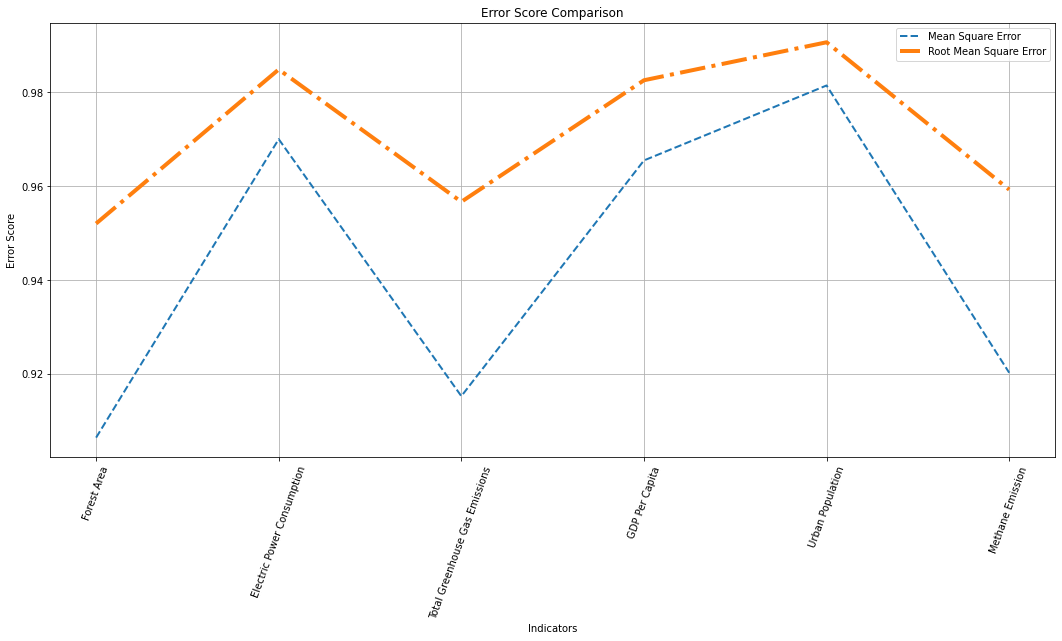

In [ ]:
# plot lines
plt.figure(figsize=(18,8))
plt.plot(frame.MODELS, frame.MSE, label = "Mean Square Error", linestyle="--", linewidth=2)
plt.plot(frame.MODELS, frame.RMSE, label = "Root Mean Square Error", linestyle="-.", linewidth=4)


plt.xticks(rotation=70)
plt.xlabel("Indicators")
plt.ylabel("Error Score")
plt.title("Error Score Comparison")
plt.grid()
plt.legend()
plt.show()

It proves to be the best model so we can say that Urban Population is really important to predict the co2 emissions 

#Algorithm selection

In [ ]:
##data = df

Features and label selection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         3892 non-null   float64
 1   year                            3892 non-null   float64
 2   Forest Area                     3892 non-null   float64
 3   Electric Power Consm            3892 non-null   float64
 4   Electric Prod From Ren          3892 non-null   float64
 5   Foss Fuel Energy Consm          3892 non-null   float64
 6   GDP Per Capita                  3892 non-null   float64
 7   Renewable Electric Output       3892 non-null   float64
 8   Total Greenhouse Gas Emissions  3892 non-null   float64
 9   Urban Population                3892 non-null   float64
 10  Foreign Direct Investment       3892 non-null   float64
 11  Methane Emissions               3892 non-null   float64
 12  CO2 Emissions Per Capita        38

In [ ]:
# Pick features from the dataframe dropping the label column
X = df.drop('CO2 Emissions Per Capita', axis=1)
# Pick label from the dataframe
y = df['CO2 Emissions Per Capita']

Splitting training and test set

In [ ]:
# Splitting of traing testing set into X and y
# Take 40% data for testing subset
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Feature scaling

It is important to scale the features for optimal predictions for all the algorithms except the random forest regression. The scaling helps model getting fitted correct feature values event though the weight of the feature values may or may not be the same.

In [ ]:
# Define scalater from sklearn library
scaler = StandardScaler()
# Scale features and label
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Algorithms

#Linear Regression

In [ ]:
# Define model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# View model intercept
model.intercept_

5.096405246273554

In [ ]:
# View model co-efficient
model.coef_

array([ 0.11640954, -0.43810985,  0.93292339,  2.07151964, -0.12743498,
        0.68875667,  0.97447566, -1.23095509, -0.87085519,  0.70778516,
       -0.19777988, -1.84052179,  2.22909129])

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([9.04673827, 9.69647474, 3.01791207, ..., 4.28320898, 0.91327417,
       6.76505184])

In [ ]:
# Mean Squared Error
np.sqrt(mean_squared_error(y_test, y_pred))

3.085750968651423

In [ ]:
# R2 score
r2_score(y_test, y_pred)

0.6370786181798969

In [ ]:
# Frame predicted values
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T

In [ ]:
# Generate line from real and predicted values
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred['pred_values'] = lin_pred['pred_values'].map(lambda x: round(x,2))
# Show comparison
lin_pred

,pred_values,real_values
0,9.05,6.421598
1,9.70,8.969955
2,3.02,5.054110
3,7.18,4.077783
4,4.77,1.449821
...,...,...
1552,4.29,1.400290
1553,8.20,6.836836
1554,4.28,1.128044
1555,0.91,0.414702


In [ ]:
# Error margin
lin_pred['diff'] = abs(lin_pred['pred_values'] - lin_pred['real_values'])
print('mean diff: ', (abs(lin_pred['diff']).mean()))

mean diff:  2.045837274367752


#Decision Tree Regression

In [ ]:
# Import decision tree regression algorithm from Sklearn
from sklearn.tree import DecisionTreeRegressor
# Train the model
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions
dtr_pred = model.predict(X_test)
dtr_pred

array([6.2063456 , 9.10678233, 5.05410998, ..., 1.06062541, 0.39112492,
       6.38706486])

In [ ]:
# Mean Squared Error
np.sqrt(mean_squared_error(y_test,dtr_pred ))

1.1595581516788835

In [ ]:
# R2 score
r2_score(y_test, dtr_pred)

0.9487521235337071

In [ ]:
# Generate frame from test values and predicted values
frames = [dtr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,6.206346,6.421598
1,9.106782,8.969955
2,5.054110,5.054110
3,3.409836,4.077783
4,1.605990,1.449821


In [ ]:
# View error margin
dtr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
dtr_pred['pred_values'] = (dtr_pred['pred_values'].map(lambda x: round(x,2)))
dtr_pred['diff'] = abs(dtr_pred['real_values'] -dtr_pred['pred_values'])
print('mean diff: ', abs(dtr_pred['diff']).mean())

mean diff:  0.4293982719800173


In [ ]:
# View actual and predicted value difference
dtr_pred.head(10)

,pred_values,real_values,diff
0,6.21,6.421598,0.211598
1,9.11,8.969955,0.140045
2,5.05,5.054110,0.004110
3,3.41,4.077783,0.667783
4,1.61,1.449821,0.160179
5,4.25,4.306851,0.056851
6,7.45,7.912585,0.462585
7,0.07,0.076063,0.006063
8,9.62,9.125985,0.494015
9,1.60,1.473834,0.126166


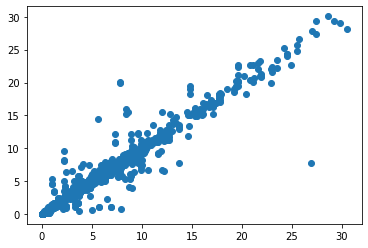

In [ ]:
plt.scatter(dtr_pred.pred_values, dtr_pred.real_values)
plt.show()

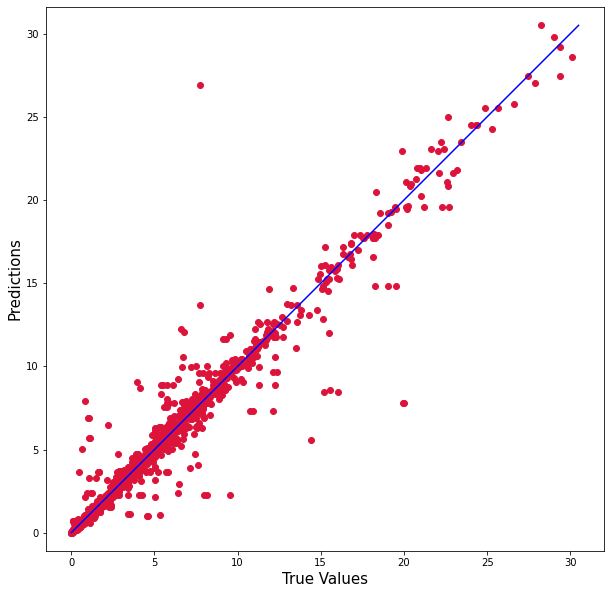

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(dtr_pred.real_values, dtr_pred.pred_values, c='crimson')


p1 = max(max(dtr_pred.pred_values), max(dtr_pred.real_values))
p2 = min(min(dtr_pred.pred_values), min(dtr_pred.real_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#Random Forest Regression

In [ ]:
# Import Random forest regression algorithm from sklearn
from sklearn.ensemble import RandomForestRegressor
# Train the model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions
y_rf_pred = rf_model.predict(X_test)
y_rf_pred

array([6.5520071 , 8.89837558, 5.05410998, ..., 1.82054279, 0.5256258 ,
       7.20727702])

In [ ]:
# Observe quality of the model
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_rf_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_rf_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_rf_pred)))
print('MSE: {:0.4f}'.format(mean_squared_error(y_test, y_rf_pred)))

RMSE: 0.9241
MAE: 0.4089
R2_score: 0.9675
MSE: 0.8539


In [ ]:
# Generate frame from predicted and actual values
frames = [y_rf_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,6.552007,6.421598
1,8.898376,8.969955
2,5.054110,5.054110
3,4.098322,4.077783
4,1.463672,1.449821


In [ ]:
# View error margin
y_rf_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_rf_pred['pred_values'] = (y_rf_pred['pred_values'].map(lambda x: round(x,2)))
y_rf_pred['diff'] = abs(y_rf_pred['real_values'] -y_rf_pred['pred_values'])
print('mean diff: ', abs(y_rf_pred['diff']).mean())

mean diff:  0.4090533141192939


In [ ]:
# View difference table of actual and predicted value
y_rf_pred.head(10)

,pred_values,real_values,diff
0,6.55,6.421598,0.128402
1,8.90,8.969955,0.069955
2,5.05,5.054110,0.004110
3,4.10,4.077783,0.022217
4,1.46,1.449821,0.010179
5,4.36,4.306851,0.053149
6,7.35,7.912585,0.562585
7,0.07,0.076063,0.006063
8,10.17,9.125985,1.044015
9,1.83,1.473834,0.356166


Plotting the prediction vs real value

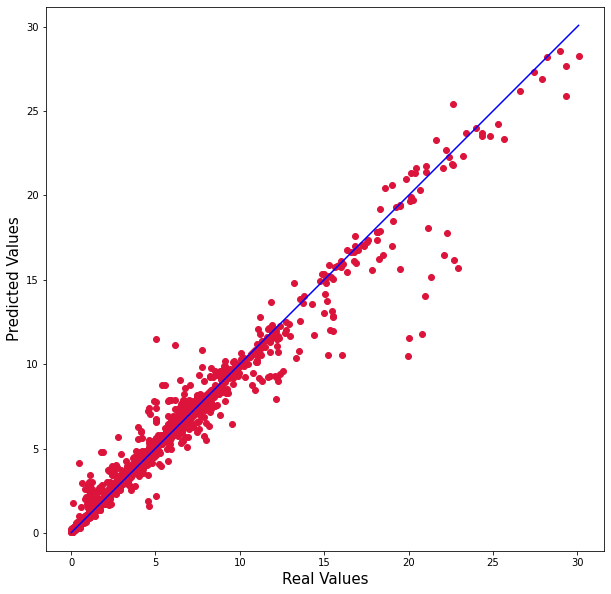

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_rf_pred.real_values, y_rf_pred.pred_values, c='crimson')

p1 = max(max(y_rf_pred.pred_values), max(y_rf_pred.real_values))
p2 = min(min(y_rf_pred.pred_values), min(y_rf_pred.real_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

Plotting the Prediction error

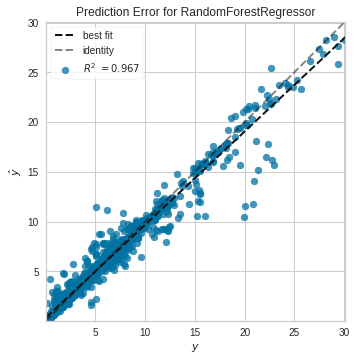

In [ ]:
from yellowbrick.regressor.influence import Visualizer
from yellowbrick.regressor import PredictionError
Visualizer= PredictionError(rf_model)
Visualizer.fit(X_train, y_train)
Visualizer.score(X_test, y_test)
Visualizer.poof()
plt.show()

# MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from math import sqrt
import warnings 
warnings.filterwarnings('ignore')
import random
#for maintaining randomness
random_state = 1

In [ ]:
MLP = MLPRegressor(max_iter=500)
param_list = {"hidden_layer_sizes": [1,2,3,5,8], 
              "solver": ["lbfgs", "sgd", "adam"],
              }
MLP_CV = ms.GridSearchCV(estimator=MLP,cv=5, param_grid=param_list)

MLP_CV.fit(X_train, y_train)

#code to check for the best parameter
MLP_CV.best_params_

{'hidden_layer_sizes': 8, 'solver': 'sgd'}

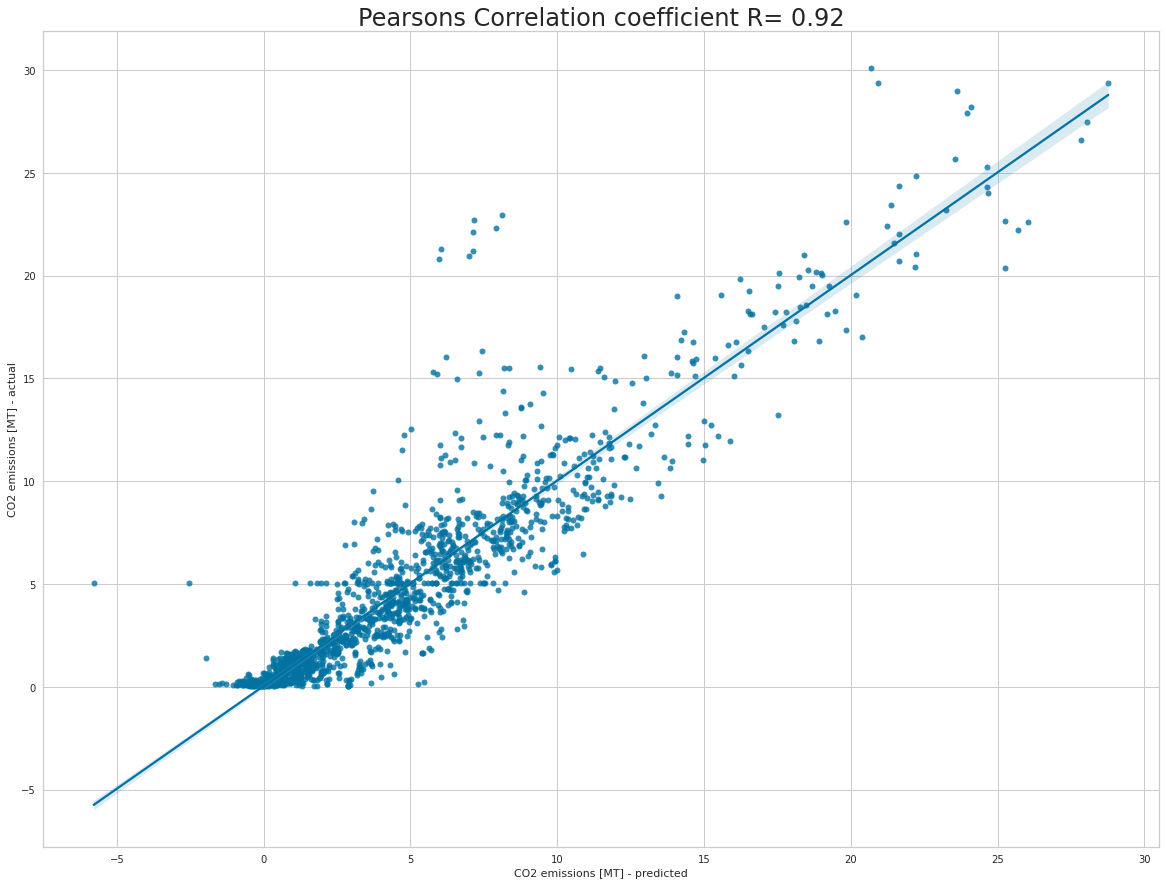

In [ ]:
MLP_tuned = MLP_CV.best_estimator_
# plot predicted vs actual values
predictions3 = MLP_tuned.predict(X_test)
f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions3, y=np.transpose(y_test), fit_reg=True)
plt.xlabel("CO2 emissions [MT] - predicted")
plt.ylabel("CO2 emissions [MT] - actual")
plt.title("Pearsons Correlation coefficient R= {}".format(round(np.corrcoef(predictions3,np.transpose(y_test))[0,1],2)))
plt.show()

In [ ]:
# Model Evaluation
test = y_test
predictions3 = MLP_tuned.predict(X_test)
print('Tuned MLP')

MLP_MAE = mean_absolute_error(test, predictions3)
print('MAE : {}'.format(MLP_MAE))
MLP_MSE = mean_squared_error(test, predictions3)
print('MSE : {}'.format(MLP_MSE))
MLP_RMSE = sqrt(MLP_MSE)
print('RMSE : %f' % MLP_RMSE)
MLP_R2_score = r2_score(test, predictions3)
print('R2_score : {}'.format(MLP_R2_score))
frame = pd.DataFrame()
frame['test'] = test
frame['predictions'] = predictions3

Tuned MLP
MAE : 1.204311227270261
MSE : 4.103334380867065
RMSE : 2.025669
R2_score : 0.8436032525544694


#Algorithms Mectrics Comparison

Next, few metrics such as Root Mean Squared Error, R2 Score, and Mean Absolute Error has been considered to generate a comparison table for the models built and tested.

In [ ]:
models =['LinReg','DT','MLP', 'RF']

frame = pd.DataFrame(columns={'models':[],'rmse_train':[], 'mae_train':[],'r2_train':[] ,'rmse_test':[], 'mae_test':[],'r2_test':[]})

for i in range(len(models)):
    if models[i] == 'LinReg': # Linear Regression
        # Define model
        model = LinearRegression()
        model.fit(X_train,y_train)
        # Make Predictions
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        # Add to dataframe
        frame.loc[frame.shape[0]] = ['Linear Regression', rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='DT': # Decision Tree
         # Define model
        model = DecisionTreeRegressor()
        model.fit(X_train,y_train)
        # Make Predictions
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        # Add to dataframe
        frame.loc[frame.shape[0]] = ['Decision Tree Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

    elif models[i] =='MLP': # Decision Tree
         # Define model
        MLP = MLPRegressor()
        model = ms.GridSearchCV(estimator=MLP,cv=5, param_grid=param_list)
        model.fit(X_train,y_train)
        # Make Predictions
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        # Add to dataframe
        frame.loc[frame.shape[0]] = ['Multi-layer Perceptron',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

    else  : 
        models[i] =='RF' # Random Forest
         # Define model
        model = RandomForestRegressor()
        model.fit(X_train,y_train)
        # Make Predictions
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
       
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        # Add to dataframe
        frame.loc[frame.shape[0]] = ['Random Forest Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

In [ ]:
# Present dataframe
frame

,models,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test
0,Linear Regression,3.022215,2.008974,0.644332,3.085751,2.045901,0.637079
1,Decision Tree Regression,0.000000,0.000000,1.000000,1.244725,0.464163,0.940948
2,Multi-layer Perceptron,1.576360,0.972046,0.903238,1.780887,1.022499,0.879117
3,Random Forest Regression,0.353478,0.153514,0.995135,0.896780,0.406704,0.969348


Text(0.5, 1.0, 'Mean absolute error of models [MT]')

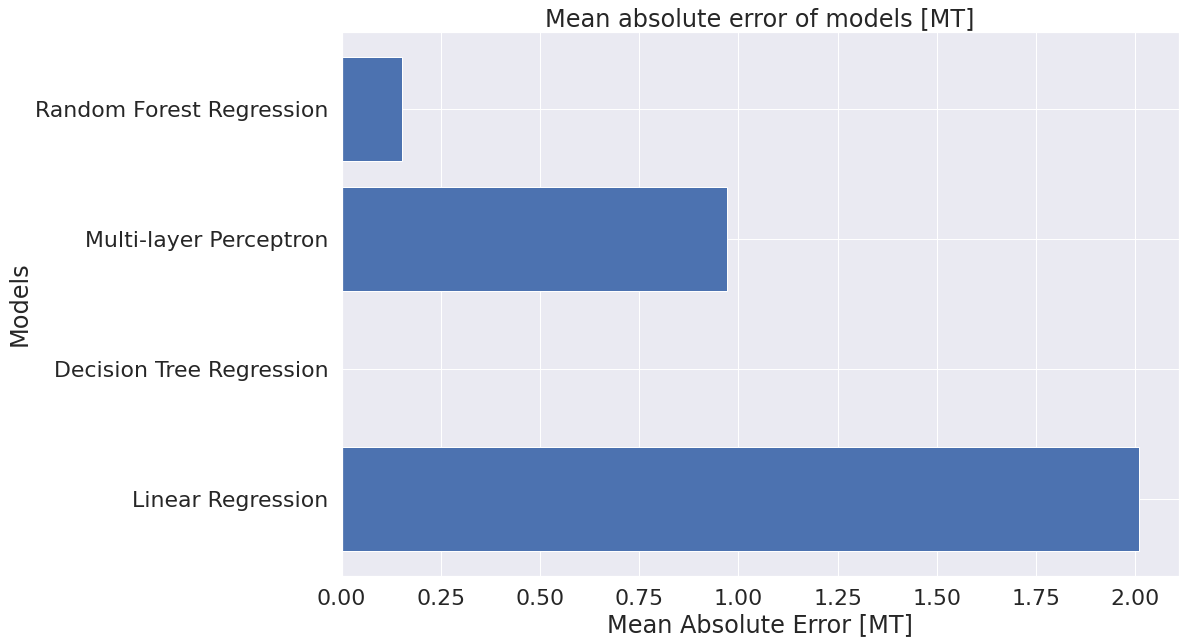

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(width = frame['mae_train'], y = frame.models)
plt.xlabel("Mean Absolute Error [MT]")
plt.ylabel("Models")
plt.title("Mean absolute error of models [MT]")



Text(0.5, 1.0, 'Model Accuracy')

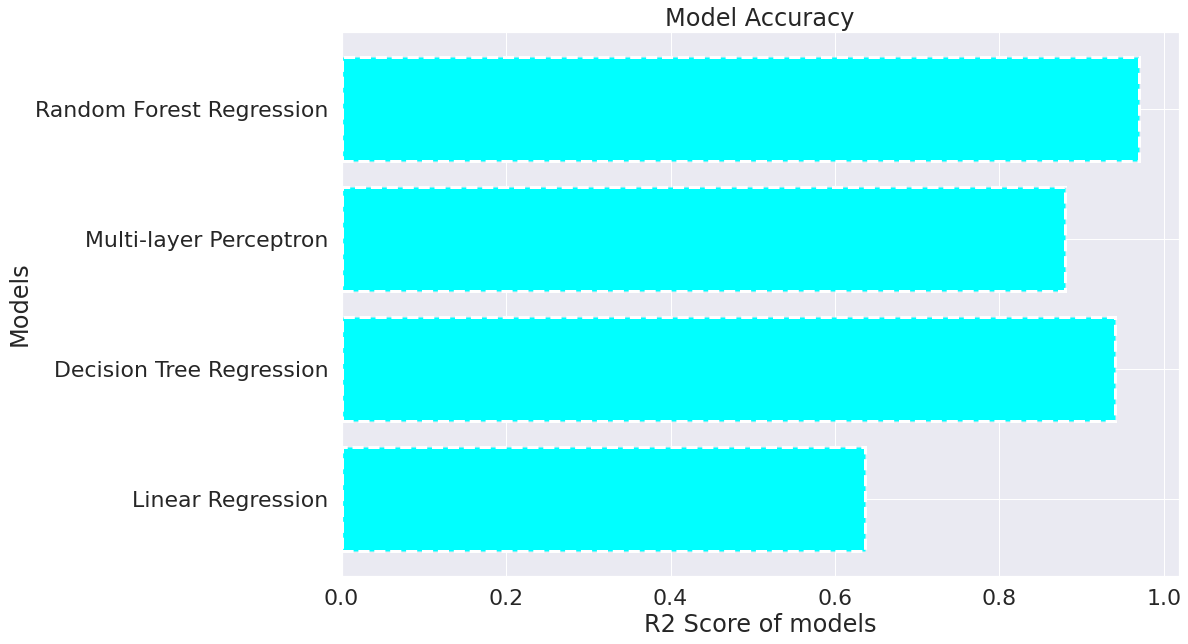

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(width = frame['r2_test'], y = frame.models, color='cyan', linestyle='dashed',
     linewidth=3)
plt.xlabel("R2 Score of models")
plt.ylabel("Models")
plt.title("Model Accuracy")